<a href="https://colab.research.google.com/github/HanineKhemir/Absenteeism-challenge-DataQuest-2025/blob/main/rcnn-object-segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opencv-python matplotlib

# Clone the Meta Segment Anything repo
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

# Install the package
!pip install -e .


Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 18.53 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment_anything


In [1]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


--2025-07-09 20:40:51--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.154.144.87, 18.154.144.74, 18.154.144.13, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.154.144.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   218MB/s    in 1.6s    

2025-07-09 20:40:53 (218 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from segment_anything import sam_model_registry, SamPredictor


In [8]:
# Settings
image_path = "/content/gabarit.jpg"  # change if needed
sam_checkpoint = "/content/sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load image
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Load SAM
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)

# Create predictor
predictor = SamPredictor(sam)
predictor.set_image(image_rgb)


In [23]:
# Define a point inside one gabarit part
input_point = np.array([[900, 1400]])  # You can change this
input_label = np.array([1])  # 1 = foreground

# Predict mask
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# Get best mask
best_mask = masks[np.argmax(scores)]


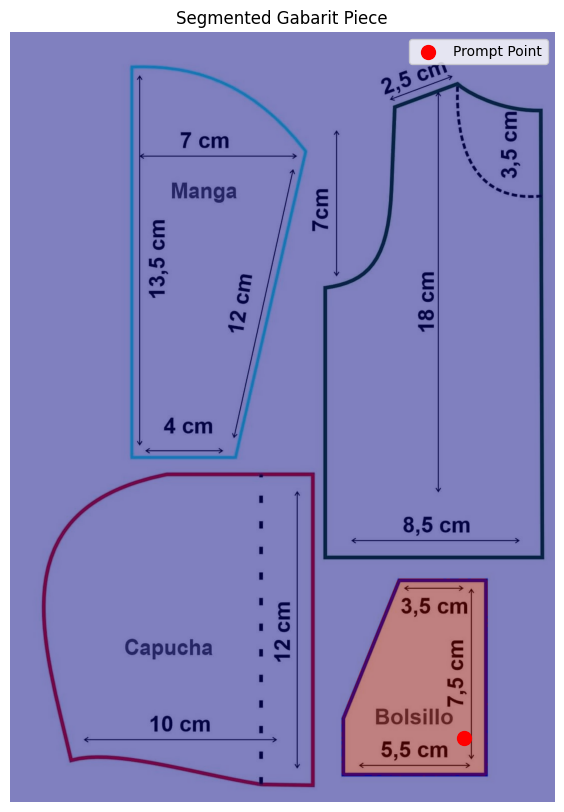

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.imshow(best_mask, alpha=0.5, cmap='jet')
plt.scatter(input_point[:, 0], input_point[:, 1], color='red', s=100, label='Prompt Point')
plt.axis('off')
plt.title('Segmented Gabarit Piece')
plt.legend()
plt.show()


In [12]:
# Save the mask in /content as PNG
cv2.imwrite("/content/segmented_mask.png", best_mask.astype(np.uint8) * 255)

# Optional: Check it's saved
import os
print("✅ File saved at:", os.path.abspath("/content/segmented_mask.png"))


✅ File saved at: /content/segmented_mask.png
